### This jupyter notebook is to unit-test CFE model run

## Preparation

In [4]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [5]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parnum_nash_storage
# 978	978	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 983	983	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 996	996	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391
# 997	997	0.921414	2.553518	0.000147	0.0691	0.007217	0.552437	0.38771	343.449845	8.484384	1.821161	0.0013	3.620361	0.75	0.13743	0.000424	4.058391

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_hourly_1998_2001.csv", 
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 2.553518, 
        "satdk": 0.000147, 
        "slop": 0.007217, 
        "satpsi": 0.0691, 
        "smcmax": 0.552437, 
        "wltsmc": 0.38771, 
        "D": 1
        }, 
        "gw_scheme": "Exponential",
        "alpha_fc": 0.13743, 
        "max_gw_storage": 343.449845, 
        "Cgw": 8.484384, 
        "expon": 1.821161, 
        "K_lf": 0.000424, 
        "refkdt": 3.620361, 
        "K_nash": 0.0013, 
        "trigger_z_fact": 0.75, 
        "num_nash_storage": 4, 
        "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_hourly_1998_2001_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

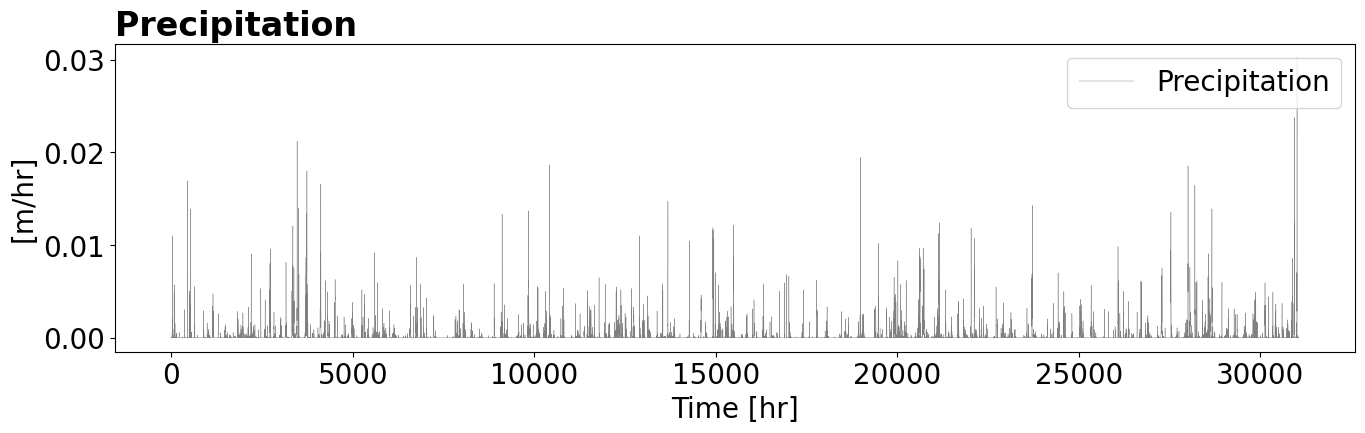

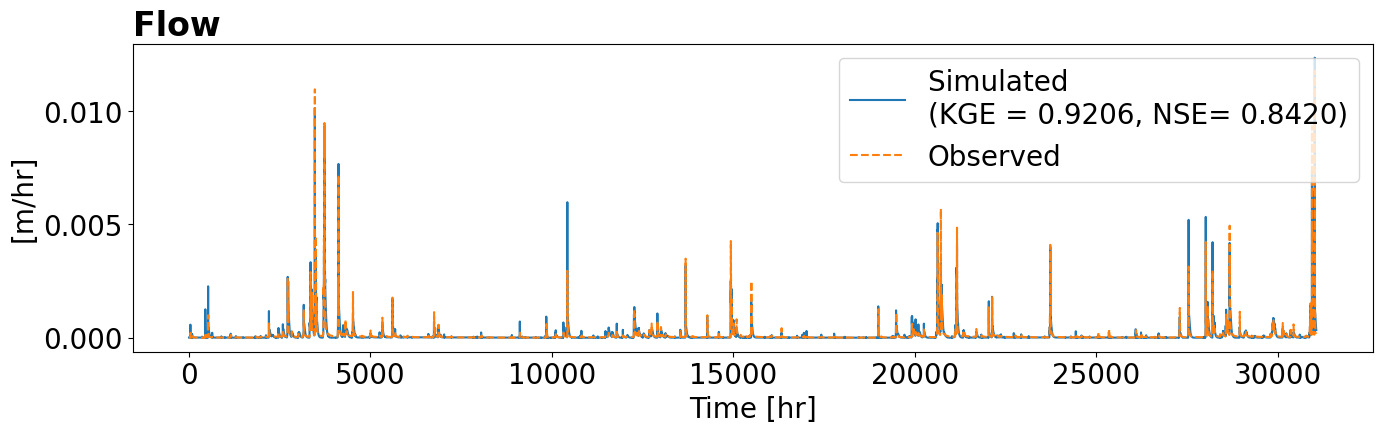

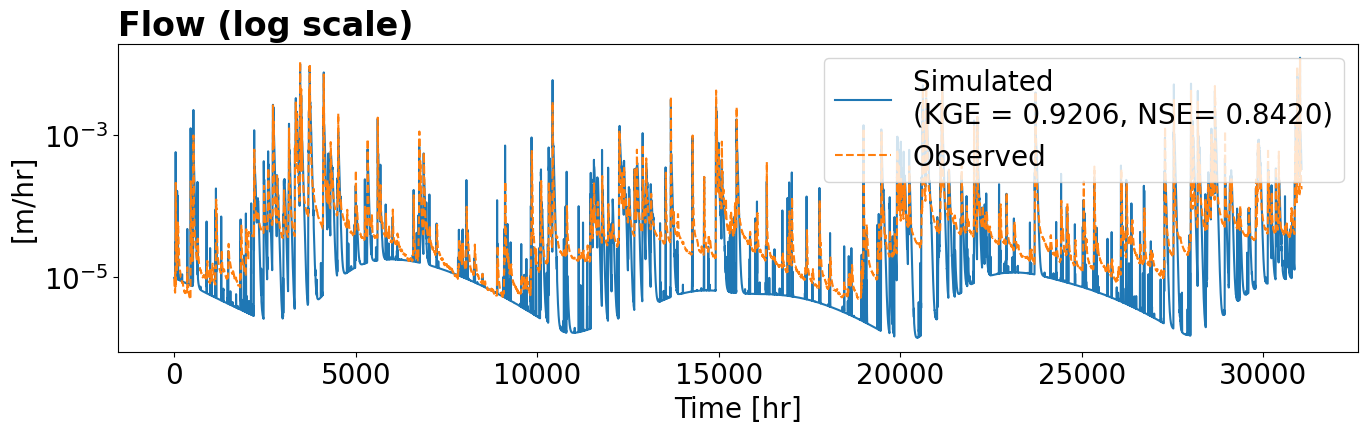

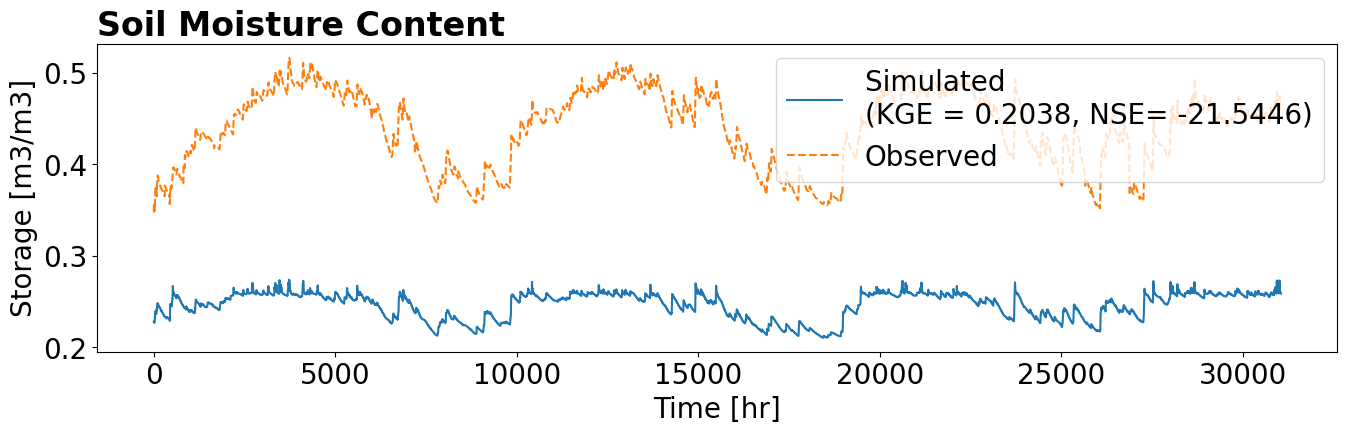

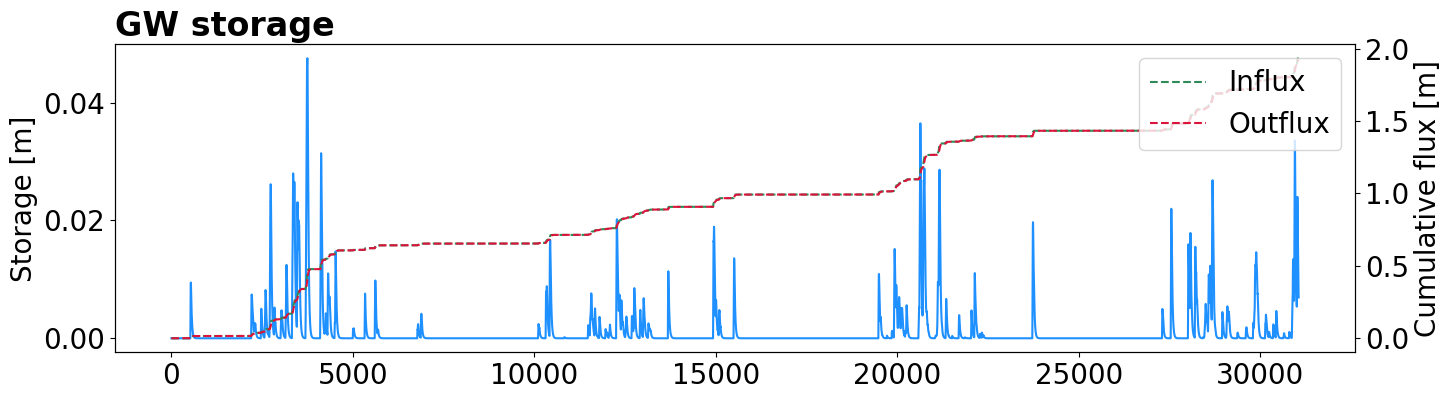

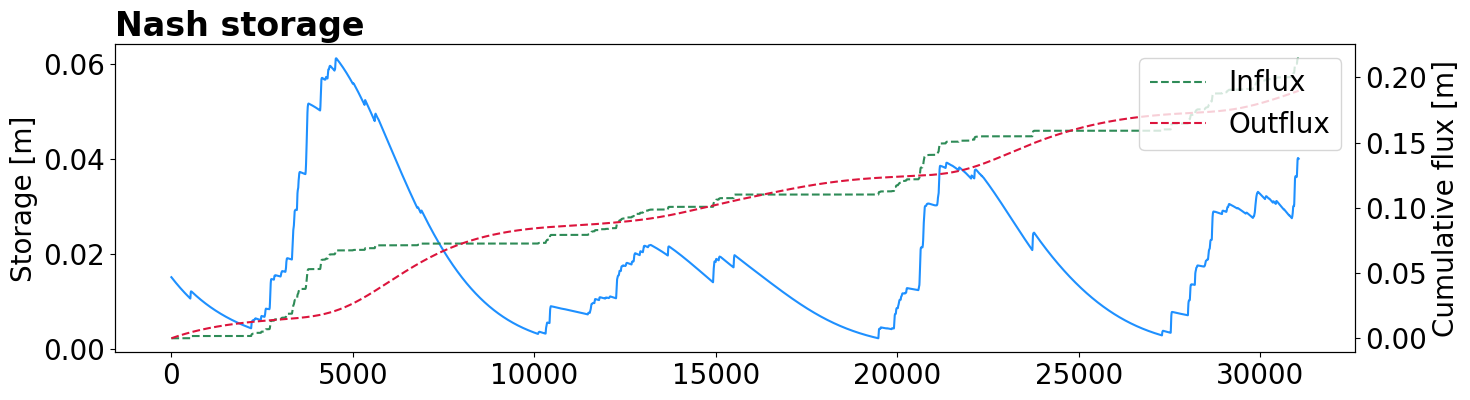

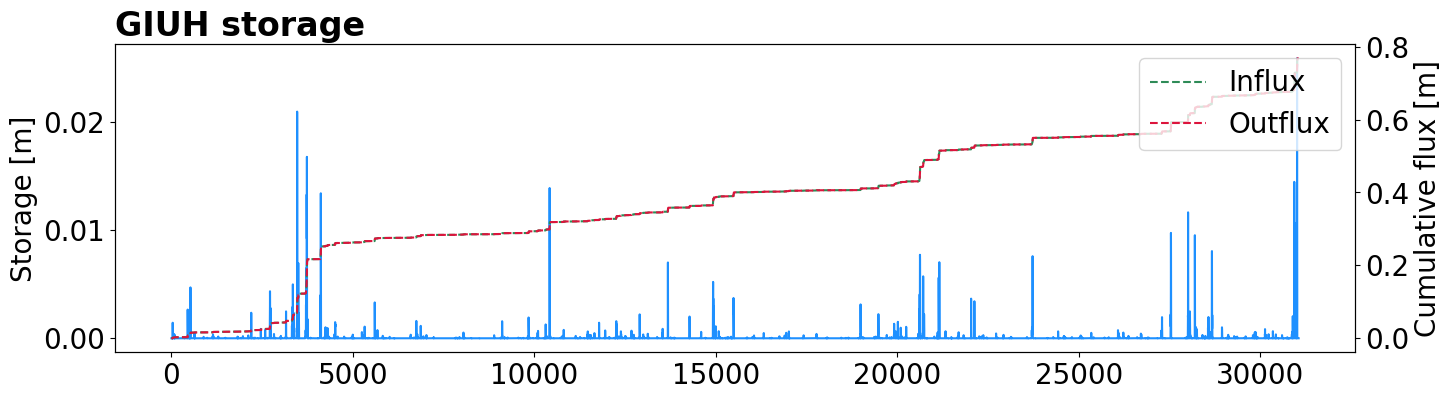


GLOBAL MASS BALANCE
      initial volume:   0.4563
        volume input:   5.9829
       volume output:   5.9148
        final volume:   0.5245
            residual: 7.5495e-14

 Discharge details
Cumulative discharge: 2.88
        Runoff ratio: 0.48
      Surface runoff: 0.27
  Deep GW to channel: 0.67
        Lateral flow: 0.07

 AET & PET
      volume PET:   4.0315
      volume AET:   3.0057
ET from rainfall:   0.4567
    ET from soil:   2.5490
    ET from gw:   0.0000

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   0.4567
  surface runoff:   0.7682
             IOF:   0.7682
             SOF:   0.0000
    infiltration:   4.7579
schaake residual: 5.5067e-14

GIUH MASS BALANCE
  vol. into giuh:   0.7682
   vol. out giuh:   0.7682
 vol. end giuh q:   0.0000
   giuh residual: -4.1078e-15

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.4563
  vol. into soil:   4.7579
vol.soil2latflow:   0.2146
 vol. soil to gw:   1.9332
 vol. soil to ET:   2.549

In [6]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 31062)),
    warm_up=True,
    warmup_offset=8000,
    warmup_iteration=10,
    verbose=True
)
cfe_instance.finalize(print_mass_balance=True)